## Running notebook to test the developed functions

In [1]:
import matplotlib.pyplot as plt
import cv2

from src import preprocessing as pp
from src import contour_detection as cd
from src import symetry_analysis as sa

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


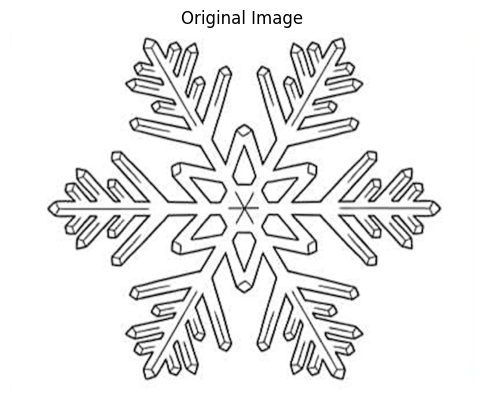

In [10]:
# Path to the uploaded image
image_path = "data/artificial2.png"
image = cv2.imread(image_path)


# Display the preprocessed image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

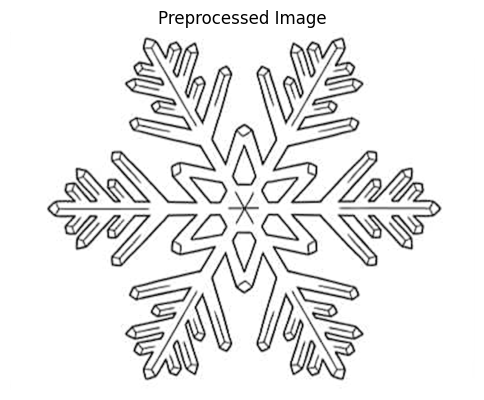

In [11]:

preprocessed_image = pp.preprocess_image(image)

# Display the preprocessed image
plt.figure(figsize=(6, 6))
plt.title("Preprocessed Image")
plt.imshow(preprocessed_image, cmap='gray')
plt.axis('off')
plt.show()

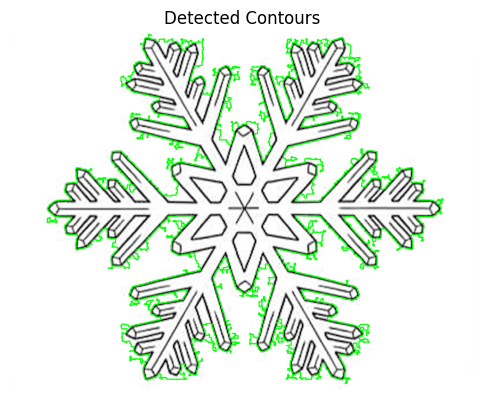

In [12]:
# Assuming preprocessed_image is already generated
contour_image, contours = cd.detect_contours(preprocessed_image)

# Display the contour_image
plt.figure(figsize=(6, 6))
plt.title("Detected Contours")
plt.imshow(contour_image)
plt.axis('off')
plt.show()

In [13]:
len(contours)

1

Contour is too small or too large; contour area:  384689.5
Contour is not circular enough to be a snowflake; circularity:  0.015699569827884206


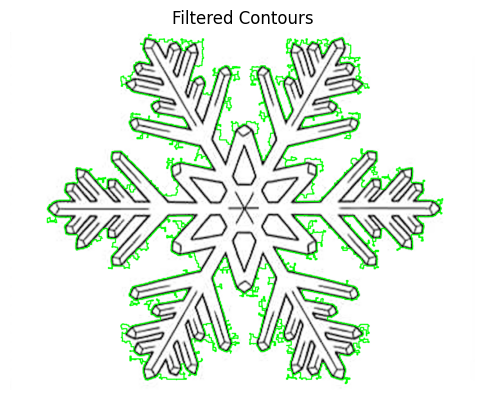

In [14]:
filtered_contour_image, filtered_contours = cd.filter_contours(preprocessed_image, contours, min_area=100, max_area=10000)#, circularity_threshold=0.01)

plt.figure(figsize=(6, 6))
plt.title("Filtered Contours")
plt.imshow(cv2.cvtColor(filtered_contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

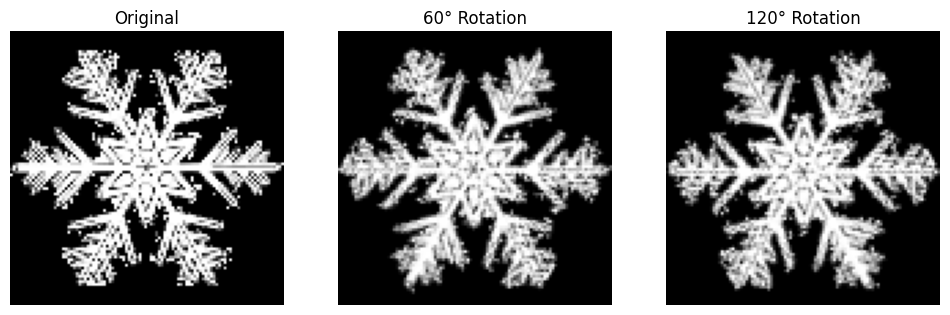

Circularity: 0.02
Average Rotational Symmetry: 0.46
Final Symmetry Score: 0.24


In [15]:
symmetry_scores = sa.analyze_symmetry(preprocessed_image, filtered_contours)

In [16]:
symmetry_scores

[0.2392841066130131]